In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
#chỉ lấy trạm 1 + pm2.5
df = pd.read_csv("/content/Air Quality Ho Chi Minh City.csv")
df_station_1 = df[df['Station_No'] == 1]
data = df_station_1['PM2.5'].values
data
data.shape

(7892,)

In [ ]:
#chuyển về 0 đến 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1,1)).flatten()
data.shape

(7892,)

In [ ]:
#train/test=70/30
train_size = int(len(data) * 0.7)
train = data[:train_size]
test = data[train_size:]
def create_dataset(dataset, steps_back):
  X, y = [], []
  for i in range(len(dataset)):
  # find the end of this pattern
    end_ix = i + steps_back
    # check if we are beyond the dataset
    if end_ix > len(dataset)-1:
      break
  # gather input and output parts of the pattern
    seq_x, seq_y = dataset[i:end_ix], dataset[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

steps_back = 15
X_train, Y_train = create_dataset(train, steps_back)
X_test, Y_test = create_dataset(test, steps_back)
X_train.shape

(5509, 15)

In [ ]:
Y_train.shape

(5509,)

In [ ]:
features = 1
#reshape model LSTM[samples, steps_back, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], features))
X_train.shape

(5509, 15, 1)

In [ ]:
#mô hình
model = Sequential()
model.add(LSTM(50, input_shape=(steps_back, features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=60, verbose=2)

Epoch 1/50
92/92 - 3s - loss: 0.0012 - 3s/epoch - 31ms/step
Epoch 2/50
92/92 - 1s - loss: 9.0813e-04 - 773ms/epoch - 8ms/step
Epoch 3/50
92/92 - 1s - loss: 8.1607e-04 - 775ms/epoch - 8ms/step
Epoch 4/50
92/92 - 1s - loss: 7.6634e-04 - 749ms/epoch - 8ms/step
Epoch 5/50
92/92 - 1s - loss: 7.2813e-04 - 721ms/epoch - 8ms/step
Epoch 6/50
92/92 - 1s - loss: 7.0220e-04 - 1s/epoch - 11ms/step
Epoch 7/50
92/92 - 1s - loss: 6.8462e-04 - 1s/epoch - 13ms/step
Epoch 8/50
92/92 - 1s - loss: 6.7683e-04 - 1s/epoch - 13ms/step
Epoch 9/50
92/92 - 1s - loss: 6.6930e-04 - 848ms/epoch - 9ms/step
Epoch 10/50
92/92 - 1s - loss: 6.5340e-04 - 751ms/epoch - 8ms/step
Epoch 11/50
92/92 - 1s - loss: 6.6102e-04 - 764ms/epoch - 8ms/step
Epoch 12/50
92/92 - 1s - loss: 6.5034e-04 - 770ms/epoch - 8ms/step
Epoch 13/50
92/92 - 1s - loss: 6.4547e-04 - 757ms/epoch - 8ms/step
Epoch 14/50
92/92 - 1s - loss: 6.4176e-04 - 775ms/epoch - 8ms/step
Epoch 15/50
92/92 - 1s - loss: 6.3999e-04 - 771ms/epoch - 8ms/step
Epoch 16/50
92/9

In [ ]:
#kết quả
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#chuyển về dạng ban đầu
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
#in kết quả
print(train_predict)
print(test_predict)

74/74 [==============================] - 0s 5ms/step
[[24.37243 ]
 [22.52557 ]
 [18.667913]
 ...
 [23.653248]
 [17.603863]
 [18.415579]]
[[24.502996]
 [33.08162 ]
 [29.75538 ]
 ...
 [14.478814]
 [13.563124]
 [12.742105]]


In [ ]:
#đánh giá = mse
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train[0], train_predict)
test_mse = mean_squared_error(Y_test[0], test_predict)
print(f'MSE (tập huấn luyện): {train_mse:.2f}')
print(f'MSE (tập kiểm thử): {test_mse:.2f}')
#đánh giá = r2
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train[0], train_predict)
r2_test = r2_score(Y_test[0], test_predict)

print(f'R-squared (tập huấn luyện): {r2_train:.2f}')
print(f'R-squared (tập kiểm thử): {r2_test:.2f}')
from sklearn.metrics import mean_absolute_error
#đánh giá = mae
mae_train = mean_absolute_error(Y_train[0], train_predict)
mae_test = mean_absolute_error(Y_test[0], test_predict)

print(f'MAE (tập huấn luyện): {mae_train:.2f}')
print(f'MAE (tập kiểm thử): {mae_test:.2f}')

MSE (tập huấn luyện): 51.48
MSE (tập kiểm thử): 30.41
R-squared (tập huấn luyện): 0.62
R-squared (tập kiểm thử): 0.78
MAE (tập huấn luyện): 3.99
MAE (tập kiểm thử): 3.88


In [ ]:
#đánh giá = rmse
train_rmse = mean_squared_error(Y_train[0], train_predict, squared=False)
test_rmse = mean_squared_error(Y_test[0], test_predict, squared=False)
print(f'RMSE (tập huấn luyện): {train_rmse:.2f}')
print(f'RMSE (tập kiểm thử): {test_rmse:.2f}')

RMSE (tập huấn luyện): 7.17
RMSE (tập kiểm thử): 5.51


In [ ]:
#đánh giá = mape
from sklearn.metrics import mean_absolute_percentage_error
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict)
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict)
print(f'MAPE (tập huấn luyện): {train_mape:.2f}')
print(f'MAPE (tập kiểm thử): {test_mape:.2f}')

MAPE (tập huấn luyện): 22403049157093.71
MAPE (tập kiểm thử): 0.37


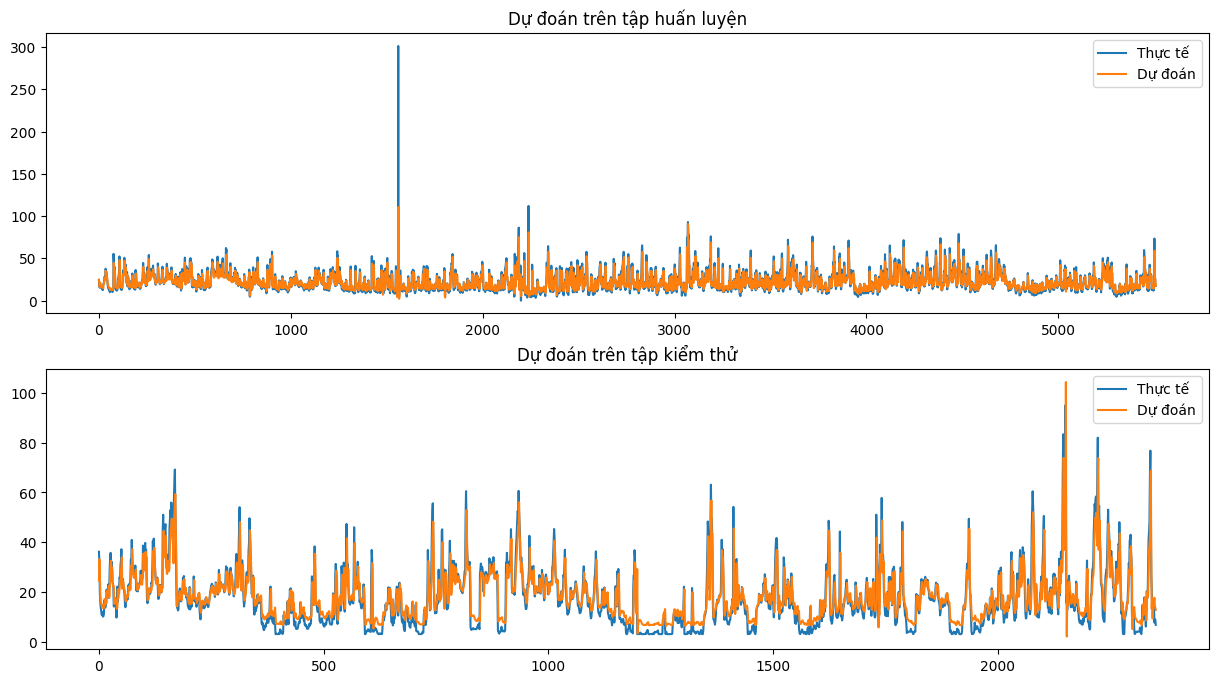

In [ ]:
#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
(fig1, fig2) = fig.subplots(2, 1)
fig1.plot(Y_train.flatten(), label='Thực tế')
fig1.plot(train_predict.flatten(), label='Dự đoán')
fig1.set_title('Dự đoán trên tập huấn luyện')
fig1.legend()
fig2.plot(Y_test.flatten(), label='Thực tế')
fig2.plot(test_predict.flatten(), label='Dự đoán')
fig2.set_title('Dự đoán trên tập kiểm thử')
fig2.legend()
plt.show()